In [68]:
! pip install bertopic embedding-atlas

In [11]:
from bertopic import BERTopic
import pandas as pd
from bs4 import BeautifulSoup

import plotly.io as pio
pio.renderers.default = "colab"

def html_cleaner(text):
    soup = BeautifulSoup(text,'html')
    return soup.text

In [12]:

df = pd.read_parquet('poverty_articles.parquet')
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(min_df=5, max_df=0.95, stop_words='english',ngram_range=(1,2))


In [13]:
corpus = df['body'].apply(html_cleaner).tolist()
df['corpus'] = corpus

In [14]:
from pathlib import Path
import numpy as np

embeds_path = Path('embeddings.npy')

if embeds_path.exists():
  embeddings = np.load(embeds_path)
else:
  from sentence_transformers import SentenceTransformer

  transformer = SentenceTransformer("all-MiniLM-L6-v2")
  embeddings = transformer.encode(corpus)
  np.save(embeds_path, embeddings)

In [15]:
model_path = Path('my_model.pkl')
if model_path.exists():
  topic_model = BERTopic.load(model_path)
else:
  topic_model = BERTopic(calculate_probabilities=True, vectorizer_model=cv)
  topic_model.fit_transform(corpus, embeddings=embeddings)
  topic_model.save(model_path, serialization='pickle')

2025-08-08 12:31:37,602 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


In [16]:
from embedding_atlas.widget import EmbeddingAtlasWidget


In [17]:
df['topic'] = [topic_model.topic_labels_[x] for x in topic_model.topics_]

In [18]:
from embedding_atlas.projection import compute_text_projection

compute_text_projection(df, text="corpus",
    x="projection_x", y="projection_y", neighbors="neighbors"
)

In [19]:
widget = EmbeddingAtlasWidget(df, text="corpus",
    x="projection_x", y="projection_y", neighbors="neighbors"
)
widget

EmbeddingAtlasWidget()

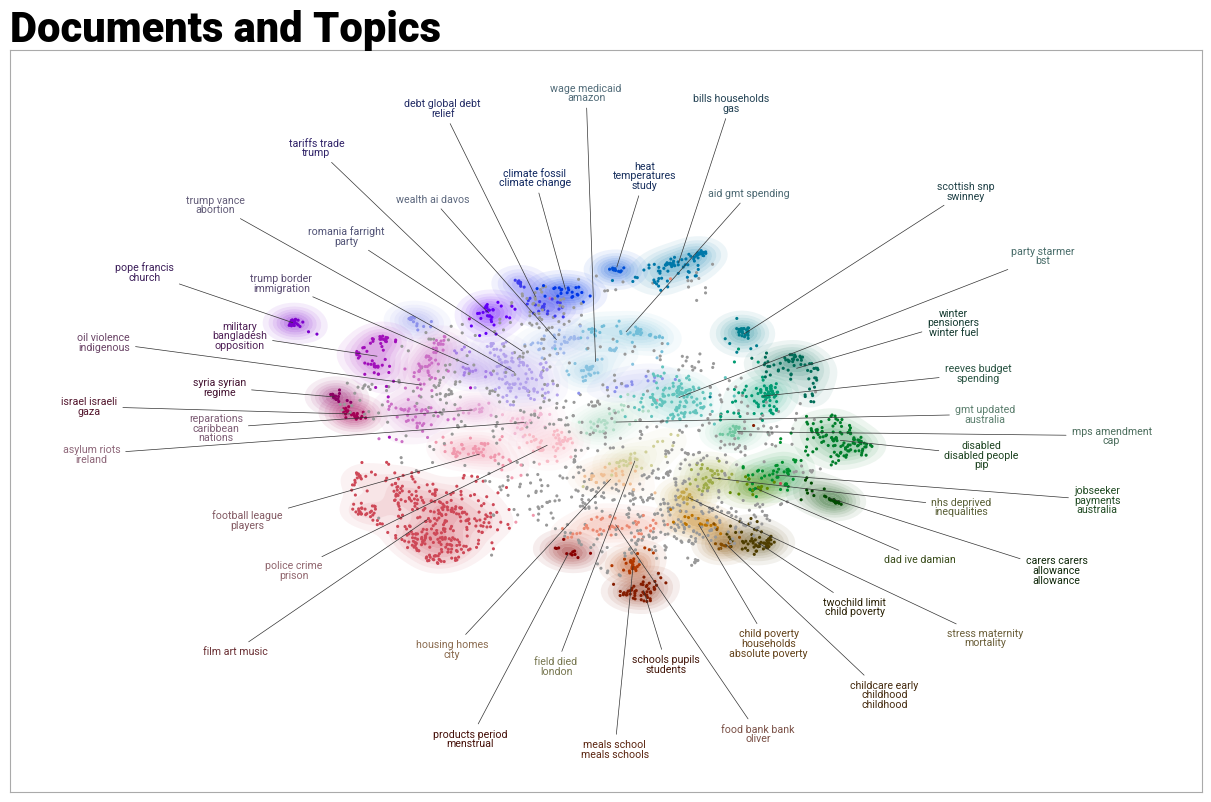

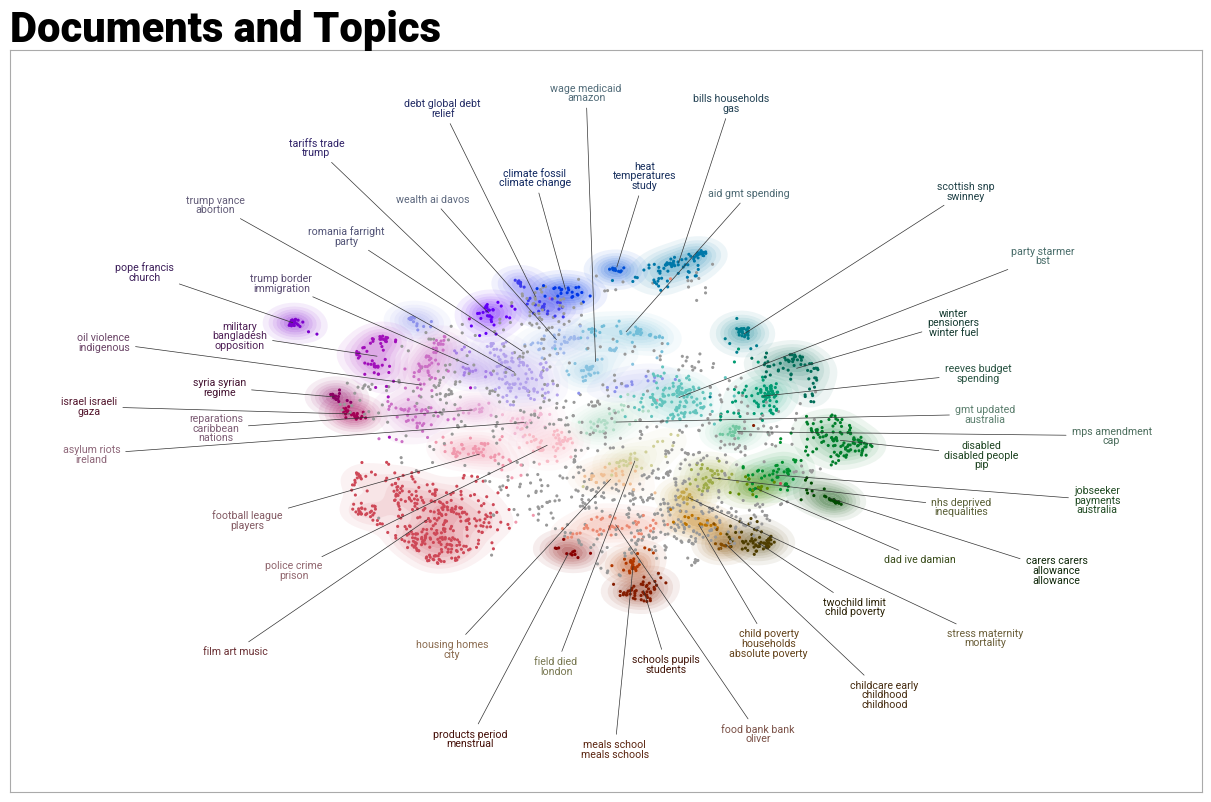

In [20]:
topic_model.visualize_document_datamap(corpus, topic_model.topics_, embeddings=embeddings)

In [72]:
from snippets import *

labels = ['sociology','space','religion','cheese']
texts = [sociology, space, religion, cheese]
texts = pd.DataFrame({'text':texts, 'label':labels})
texts

text      label
0  Sociology is the scientific study of human soc...  sociology
1  Space, often referred to as outer space, is th...      space
2  Religion is a complex and multifaceted social ...   religion
3  Cheese, a dairy product made by coagulating mi...     cheese

In [73]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups

# cats = ('alt.atheism','sci.space','sci.electronics','soc.religion.christian')

# ng_data = fetch_20newsgroups(remove=('headers','footers','quotes'), categories=cats, subset='all')
# df = pd.DataFrame(ng_data['data'], columns=['text'])
# df['label'] = ng_data.target

# label_lookup = {i:name for i, name in enumerate(ng_data.target_names)}
# df['label_text'] = df['label'].map(label_lookup)
# df







In [75]:
from sklearn.decomposition import PCA
tfidf = TfidfVectorizer(max_df=0.99, stop_words='english', ngram_range=(1,2))

X = tfidf.fit_transform(texts['text'])
pca = PCA(2)
components = pca.fit_transform(X)

In [76]:
texts

text      label
0  Sociology is the scientific study of human soc...  sociology
1  Space, often referred to as outer space, is th...      space
2  Religion is a complex and multifaceted social ...   religion
3  Cheese, a dairy product made by coagulating mi...     cheese

In [111]:
a = """Rabbits do not do much in space.
In fact rabbits spend most of their time being rabbits rather than astronauts,
because they are rabbits, which is fine for rabbits"""

b = """ Astronauts are serious and scientific. They explore space,
because they are astronauts and that is what astronauts do. Important astronaut stuff.
"""

c = """The previous sentences were about rabbits, and astronauts respectively.
Astronauts are not much like rabbits, but this sentence addresses both topics."""

d = """This sentence talks about rabits mostly because we all love rabbits. We
also enjoy astrounauts though we mention astronauts one less time than rabbits."""

labels = ["Mostly Rabbits","Mostly Astronauts","Balanced","Slightly more rabbit"]
columns = ['n_rabbits','n_astronauts', 'n_space']
rabbit_counts = [4, 0, 2, 3]
astronaut_counts = [1,4,2,2]
space_counts = [1, 1, 0, 1]

data = {'n_rabbits':rabbit_counts,
        'n_astronauts':astronaut_counts,
        'n_space':space_counts,
        'label':labels}

toy_example = pd.DataFrame(data)
toy_example['marker_size'] = 10



In [112]:
px.scatter(toy_example, x='n_rabbits', y='n_astronauts', size='marker_size',color='label')

In [108]:
px.scatter_3d(toy_example, x='n_rabbits', y='n_astronauts', z='n_space',color='label')

In [81]:
texts['pca_x'] = components[:,0]
texts['pca_y'] = components[:,1]

from plotly import express as px

px.scatter(texts, x='pca_x', y='pca_y', color='label', text='label')


In [ ]:
widget.

EmbeddingAtlasWidget()

In [ ]:
widget.selection()

id      type  \
0   business/article/2024/aug/02/uk-funding-techno...   article   
1   business/article/2024/jul/12/british-chipmaker...   article   
2   commentisfree/article/2024/jul/10/rachel-reeve...   article   
3   business/article/2024/aug/04/a-simple-solution...   article   
4   business/article/2024/sep/01/germany-economy-p...   article   
5   business/article/2024/may/30/business-manifest...   article   
6   business/nils-pratley-on-finance/article/2024/...   article   
7   business/2024/feb/07/sainsburys-does-not-rule-...   article   
8   business/article/2024/jul/21/uk-services-based...   article   
9   technology/2023/may/20/labour-should-pledge-11...   article   
10  business/article/2024/jul/25/lloyds-bank-defau...   article   
11  australia-news/article/2024/may/14/australia-f...   article   
12  business/article/2024/jul/25/british-gas-profi...   article   
13  business/article/2024/jul/25/anglo-american-ta...   article   
14  business/article/2024/jun/25/uk-winemaker-chap...   article   
15  business/article/2024/jul/31/taylor-wimpey-lab...   article   
16  business/live/2024/jun/06/us-antitrust-inquiri...  liveblog   
17  business/article/2024/jul/09/rachel-reeves-nat...   article   
18  business/live/2024/sep/05/royal-mail-must-impr...  liveblog   
19  business/live/2024/jul/12/pound-hovers-one-yea...  liveblog   
20  business/live/2024/feb/02/ai-jobs-bank-of-engl...  liveblog   
21  business/live/2023/dec/06/elon-musks-x-ai-1bn-...  liveblog   
22  business/live/2024/sep/17/microsoft-share-buyb...  liveblog   
23  australia-news/2024/jan/31/afternoon-update-in...   article   
24  business/live/2024/sep/04/markets-slump-growth...  liveblog   
25  technology/2023/jun/11/falling-funds-and-the-r...   article   
26  business/2024/mar/14/imf-kristalina-georgieva-...   article   
27  business/2024/apr/07/from-hs2-to-the-nhs-brita...   article   
28  business/live/2024/sep/12/john-lewis-partnersh...  liveblog   
29  business/nils-pratley-on-finance/article/2024/...   article   
30  business/article/2024/sep/07/labours-first-job...   article   
31  commentisfree/article/2024/jun/15/labours-choc...   article   
32  business/2024/apr/09/m-and-s-invests-methane-b...   article   
33  world/2024/apr/17/efficient-reliable-and-fragr...   article   
34  business/live/2024/aug/07/uk-house-prices-jump...  liveblog   
35  business/2024/mar/16/sainsburys-grocery-delive...   article   
36  australia-news/article/2024/sep/07/nostalgic-g...   article   
37  business/2024/jan/16/uk-pay-growth-inflation-v...   article   
38  business/live/2024/jul/02/sainsburys-sales-slo...  liveblog   
39  business/2024/apr/25/sainsburys-sales-big-tick...   article   
40  business/live/2024/apr/04/brexit-food-import-c...  liveblog   
41  business/live/2023/may/30/asda-10bn-petrol-sta...  liveblog   
42  politics/article/2024/aug/16/rba-inflation-int...   article   
43  commentisfree/article/2024/aug/25/britain-coul...   article   
44  business/article/2024/sep/08/australian-econom...   article   
45  politics/2024/apr/09/how-realistic-labour-aspi...   article   
46  business/live/2024/jan/10/inflationary-pressur...  liveblog   
47  australia-news/article/2024/jul/16/australias-...   article   
48  business/2024/mar/17/us-small-businesses-hirin...   article   
49  business/2023/oct/26/ecb-keeps-interest-rates-...   article   
50  australia-news/article/2024/jun/19/coalition-a...   article   
51  business/article/2024/jul/21/its-been-raining-...   article   

         sectionId     sectionName        webPublicationDate  \
0         business        Business 2024-08-02 10:15:31+00:00   
1         business        Business 2024-07-12 14:04:03+00:00   
2    commentisfree         Opinion 2024-07-10 15:07:18+00:00   
3         business        Business 2024-08-04 11:02:05+00:00   
4         business        Business 2024-09-01 10:32:29+00:00   
5         business        Business 2024-05-30 14:38:46+00:00   
6         business        Business 2024-08-05 16:45

In [ ]:
topic_model.visualize_barchart(n_words=10, height=400)